In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn.cluster import KMeans

**Carregando e pré-processando os dados;**

In [2]:
dados_perfil = pd.read_excel('dados_perfil.xlsx')
dados_perfil

,ID,Gênero,Idade,Consumo de Álcool,Atividade Física,cod_uf
0,1,M,74.0,Moderado,Atividade Moderada,31
1,2,F,34.0,Baixo,Atividade Moderada,35
2,3,M,18.0,Moderado,Atividade Moderada,29
3,4,M,72.0,Baixo,Sedentário,15
4,5,F,63.0,Baixo,Atividade Moderada,41
...,...,...,...,...,...,...
995,996,F,NaN,Moderado,Sedentário,23
996,997,M,24.0,Baixo,Ativo,23
997,998,M,78.0,Baixo,Atividade Moderada,41
998,999,M,57.0,Baixo,Atividade Moderada,51


In [3]:
dados_perfil.isnull().sum()

ID                    0
Gênero                0
Idade                10
Consumo de Álcool     0
Atividade Física      0
cod_uf                0
dtype: int64

In [4]:
#Excluindo valores nulos.
dados_perfil.dropna(inplace=True)
dados_perfil

,ID,Gênero,Idade,Consumo de Álcool,Atividade Física,cod_uf
0,1,M,74.0,Moderado,Atividade Moderada,31
1,2,F,34.0,Baixo,Atividade Moderada,35
2,3,M,18.0,Moderado,Atividade Moderada,29
3,4,M,72.0,Baixo,Sedentário,15
4,5,F,63.0,Baixo,Atividade Moderada,41
...,...,...,...,...,...,...
994,995,F,18.0,Alto,Sedentário,31
996,997,M,24.0,Baixo,Ativo,23
997,998,M,78.0,Baixo,Atividade Moderada,41
998,999,M,57.0,Baixo,Atividade Moderada,51


In [5]:
dados_medicos = pd.read_csv('dados_medicos.csv',encoding='latin1',sep=';')
dados_medicos

,ID,IMC,Pressão Sistólica,Pressão Diastólica,Nível de Açúcar,peso,Colesterol Total,Triglicerídeos,Histórico Familiar - Cardiaco
0,1,31.7,139,70,Normal,162.1,262.8,152.6,Sim
1,2,28.1,93,66,Normal,193.4,199.2,152.4,Sim
2,3,26.1,109,86,Normal,162.2,223.4,190.1,Não
3,4,31.6,159,87,Normal,155.4,189.7,130.2,Não
4,5,37.2,99,63,Normal,161.5,218.3,146.0,Não
...,...,...,...,...,...,...,...,...,...
995,996,21.8,129,75,Normal,196.8,221.2,117.4,Não
996,997,21.8,137,73,Normal,171.4,194.3,125.2,Sim
997,998,37.1,94,70,Alto,157.6,188.2,120.7,Sim
998,999,30.4,141,77,Alto,112.2,147.5,54.6,Sim


In [6]:
dados_medicos.isnull().sum()

ID                                0
IMC                               0
Pressão Sistólica                 0
Pressão Diastólica                0
Nível de Açúcar                   0
peso                              0
Colesterol Total                 11
Triglicerídeos                    0
Histórico Familiar - Cardiaco     0
dtype: int64

In [7]:
#Substituindo os valores nulos pela média da coluna;
dados_medicos.fillna(dados_medicos['Colesterol Total'].mean(), inplace=True,)
dados_medicos.isnull().sum()

ID                               0
IMC                              0
Pressão Sistólica                0
Pressão Diastólica               0
Nível de Açúcar                  0
peso                             0
Colesterol Total                 0
Triglicerídeos                   0
Histórico Familiar - Cardiaco    0
dtype: int64

In [8]:
dados_estados = pd.read_csv('unidades_federativas_do_Brasil.csv',encoding='latin1',sep=';')
dados_estados

,codigo_uf,uf,nome,latitude,longitude,regiao,pais
0,11,RO,Rondônia,-10.83,-63.34,Norte,Brasil
1,12,AC,Acre,-8.77,-70.55,Norte,Brasil
2,13,AM,Amazonas,-3.47,-65.10,Norte,Brasil
3,14,RR,Roraima,1.99,-61.33,Norte,Brasil
4,15,PA,Pará,-3.79,-52.48,Norte,Brasil
5,16,AP,Amapá,1.41,-51.77,Norte,Brasil
6,17,TO,Tocantins,-9.46,-48.26,Norte,Brasil
7,21,MA,Maranhão,-5.42,-45.44,Nordeste,Brasil
8,22,PI,Piauí,-6.60,-42.28,Nordeste,Brasil
9,23,CE,Ceará,-5.20,-39.53,Nordeste,Brasil


In [9]:
dados_estados.isnull().sum()

codigo_uf    0
uf           0
nome         0
latitude     0
longitude    0
regiao       0
pais         0
dtype: int64

In [10]:
#Juntando os datasets;
perfil_medicos_merged = pd.merge(dados_perfil, dados_medicos, on='ID')
perfil_medicos_merged

,ID,Gênero,Idade,Consumo de Álcool,Atividade Física,cod_uf,IMC,Pressão Sistólica,Pressão Diastólica,Nível de Açúcar,peso,Colesterol Total,Triglicerídeos,Histórico Familiar - Cardiaco
0,1,M,74.0,Moderado,Atividade Moderada,31,31.7,139,70,Normal,162.1,262.8,152.6,Sim
1,2,F,34.0,Baixo,Atividade Moderada,35,28.1,93,66,Normal,193.4,199.2,152.4,Sim
2,3,M,18.0,Moderado,Atividade Moderada,29,26.1,109,86,Normal,162.2,223.4,190.1,Não
3,4,M,72.0,Baixo,Sedentário,15,31.6,159,87,Normal,155.4,189.7,130.2,Não
4,5,F,63.0,Baixo,Atividade Moderada,41,37.2,99,63,Normal,161.5,218.3,146.0,Não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,995,F,18.0,Alto,Sedentário,31,32.7,148,87,Normal,154.2,203.7,152.9,Não
986,997,M,24.0,Baixo,Ativo,23,21.8,137,73,Normal,171.4,194.3,125.2,Sim
987,998,M,78.0,Baixo,Atividade Moderada,41,37.1,94,70,Alto,157.6,188.2,120.7,Sim
988,999,M,57.0,Baixo,Atividade Moderada,51,30.4,141,77,Alto,112.2,147.5,54.6,Sim


In [11]:
dados_estados = dados_estados.rename(columns={'codigo_uf': 'cod_uf'})
dados_merged = pd.merge(perfil_medicos_merged, dados_estados, on='cod_uf')
dados_merged


,ID,Gênero,Idade,Consumo de Álcool,Atividade Física,cod_uf,IMC,Pressão Sistólica,Pressão Diastólica,Nível de Açúcar,peso,Colesterol Total,Triglicerídeos,Histórico Familiar - Cardiaco,uf,nome,latitude,longitude,regiao,pais
0,1,M,74.0,Moderado,Atividade Moderada,31,31.7,139,70,Normal,162.1,262.8,152.6,Sim,MG,Minas Gerais,-18.10,-44.38,Sudeste,Brasil
1,6,F,78.0,Moderado,Atividade Moderada,31,24.2,165,81,Normal,148.6,183.3,154.3,Não,MG,Minas Gerais,-18.10,-44.38,Sudeste,Brasil
2,65,M,41.0,Moderado,Atividade Moderada,31,35.2,109,61,Normal,173.3,165.2,73.5,Sim,MG,Minas Gerais,-18.10,-44.38,Sudeste,Brasil
3,97,M,58.0,Baixo,Atividade Moderada,31,25.3,170,95,Alto,153.6,141.7,140.5,Não,MG,Minas Gerais,-18.10,-44.38,Sudeste,Brasil
4,98,F,22.0,Moderado,Atividade Moderada,31,20.8,148,65,Normal,129.0,150.1,156.9,Não,MG,Minas Gerais,-18.10,-44.38,Sudeste,Brasil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,870,F,26.0,Baixo,Sedentário,52,32.3,112,92,Normal,159.2,201.5,133.5,Sim,GO,Goiás,-15.98,-49.86,Centro-Oeste,Brasil
986,905,F,18.0,Baixo,Sedentário,52,32.7,140,82,Alto,135.9,166.1,151.1,Não,GO,Goiás,-15.98,-49.86,Centro-Oeste,Brasil
987,907,M,58.0,Moderado,Atividade Moderada,52,32.8,107,82,Normal,124.1,206.5,113.5,Não,GO,Goiás,-15.98,-49.86,Centro-Oeste,Brasil
988,940,F,30.0,Moderado,Atividade Moderada,52,28.0,155,63,Normal,170.3,202.6,160.2,Sim,GO,Goiás,-15.98,-49.86,Centro-Oeste,Brasil


**Criando e executando algoritmo k-means;**

In [12]:
X = np.array(dados_merged[['peso','Triglicerídeos']])
X

array([[162.1, 152.6],
       [148.6, 154.3],
       [173.3,  73.5],
       ...,
       [124.1, 113.5],
       [170.3, 160.2],
       [130.9, 176.3]])

In [13]:
Kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')

In [14]:
Kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [15]:
Kmeans.labels_

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 2, 0, 1, 0, 0,
       0, 1, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 1, 0, 0, 0, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 1, 1,
       0, 2, 1, 2, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 1,
       2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2, 1, 1, 0,
       0, 2, 0, 2, 0, 1, 1, 0, 0, 1, 1, 0, 0, 2, 2, 2, 0, 1, 0, 2, 1, 2,
       0, 1, 0, 0, 1, 0, 2, 2, 0, 0, 1, 0, 0, 1, 2, 2, 1, 0, 2, 1, 2, 2,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1, 0, 2, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 1,
       1, 2, 0, 0, 0, 2, 0, 0, 1, 2, 2, 0, 0, 1, 0, 0, 2, 0, 2, 1, 1, 0,
       2, 2, 2, 0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 2,
       2, 0, 2, 1, 1, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 2,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 2, 2, 2, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 2, 2, 1, 1, 0,

In [16]:
#Inserindo as classes Criadas pelo algoritmo no dataframe.
dados_merged['k-class'] = Kmeans.labels_
dados_merged

,ID,Gênero,Idade,Consumo de Álcool,Atividade Física,cod_uf,IMC,Pressão Sistólica,Pressão Diastólica,Nível de Açúcar,...,Colesterol Total,Triglicerídeos,Histórico Familiar - Cardiaco,uf,nome,latitude,longitude,regiao,pais,k-class
0,1,M,74.0,Moderado,Atividade Moderada,31,31.7,139,70,Normal,...,262.8,152.6,Sim,MG,Minas Gerais,-18.10,-44.38,Sudeste,Brasil,0
1,6,F,78.0,Moderado,Atividade Moderada,31,24.2,165,81,Normal,...,183.3,154.3,Não,MG,Minas Gerais,-18.10,-44.38,Sudeste,Brasil,0
2,65,M,41.0,Moderado,Atividade Moderada,31,35.2,109,61,Normal,...,165.2,73.5,Sim,MG,Minas Gerais,-18.10,-44.38,Sudeste,Brasil,1
3,97,M,58.0,Baixo,Atividade Moderada,31,25.3,170,95,Alto,...,141.7,140.5,Não,MG,Minas Gerais,-18.10,-44.38,Sudeste,Brasil,0
4,98,F,22.0,Moderado,Atividade Moderada,31,20.8,148,65,Normal,...,150.1,156.9,Não,MG,Minas Gerais,-18.10,-44.38,Sudeste,Brasil,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,870,F,26.0,Baixo,Sedentário,52,32.3,112,92,Normal,...,201.5,133.5,Sim,GO,Goiás,-15.98,-49.86,Centro-Oeste,Brasil,0
986,905,F,18.0,Baixo,Sedentário,52,32.7,140,82,Alto,...,166.1,151.1,Não,GO,Goiás,-15.98,-49.86,Centro-Oeste,Brasil,0
987,907,M,58.0,Moderado,Atividade Moderada,52,32.8,107,82,Normal,...,206.5,113.5,Não,GO,Goiás,-15.98,-49.86,Centro-Oeste,Brasil,1
988,940,F,30.0,Moderado,Atividade Moderada,52,28.0,155,63,Normal,...,202.6,160.2,Sim,GO,Goiás,-15.98,-49.86,Centro-Oeste,Brasil,0


**Representação gráfica baseada nas features utilizadas na
clusterização;**

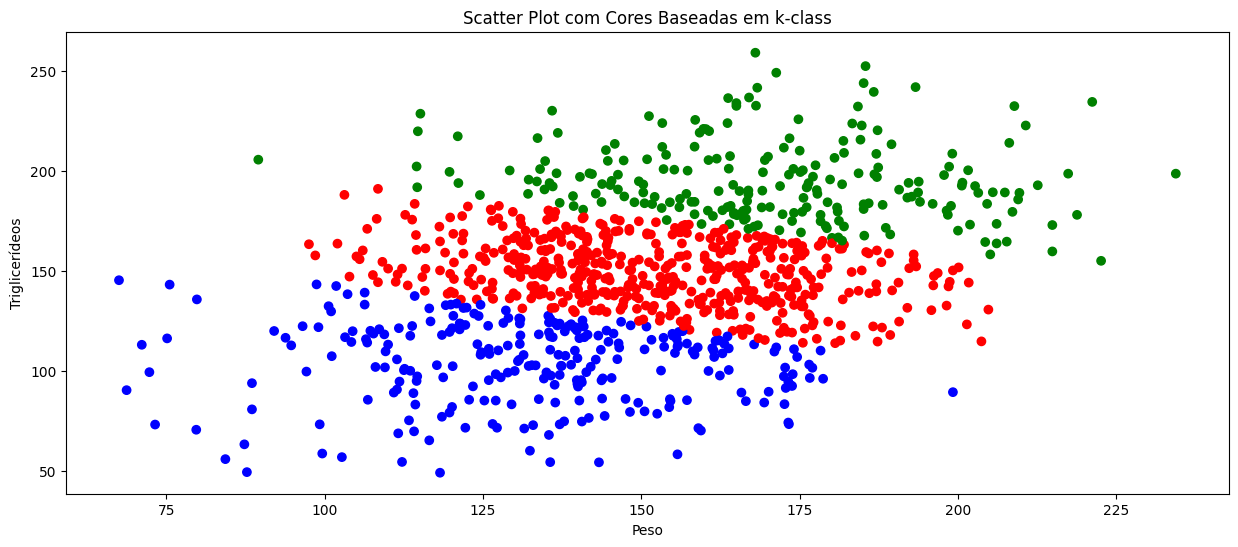

In [17]:
triglicerideos = dados_merged['Triglicerídeos']
peso = dados_merged['peso']
k_class = dados_merged['k-class']

colors = ['red', 'blue', 'green']
k_class_colors = [colors[label] for label in k_class]
plt.figure(figsize=(15, 6))
plt.scatter(peso, triglicerideos, c=k_class_colors)
plt.xlabel('Peso')
plt.ylabel('Triglicerídeos')
plt.title('Scatter Plot com Cores Baseadas em k-class')
plt.show()

In [18]:
#Definindo um correspondente de risco para cada cluster baseado na representação gráfica.
dados_merged['Risco'] = dados_merged['k-class'].apply(lambda x: 'Alto Risco' if x == 0 else ('Risco Intermediário' if x == 1 else 'Risco Muito Alto'))
dados_merged

,ID,Gênero,Idade,Consumo de Álcool,Atividade Física,cod_uf,IMC,Pressão Sistólica,Pressão Diastólica,Nível de Açúcar,...,Triglicerídeos,Histórico Familiar - Cardiaco,uf,nome,latitude,longitude,regiao,pais,k-class,Risco
0,1,M,74.0,Moderado,Atividade Moderada,31,31.7,139,70,Normal,...,152.6,Sim,MG,Minas Gerais,-18.10,-44.38,Sudeste,Brasil,0,Alto Risco
1,6,F,78.0,Moderado,Atividade Moderada,31,24.2,165,81,Normal,...,154.3,Não,MG,Minas Gerais,-18.10,-44.38,Sudeste,Brasil,0,Alto Risco
2,65,M,41.0,Moderado,Atividade Moderada,31,35.2,109,61,Normal,...,73.5,Sim,MG,Minas Gerais,-18.10,-44.38,Sudeste,Brasil,1,Risco Intermediário
3,97,M,58.0,Baixo,Atividade Moderada,31,25.3,170,95,Alto,...,140.5,Não,MG,Minas Gerais,-18.10,-44.38,Sudeste,Brasil,0,Alto Risco
4,98,F,22.0,Moderado,Atividade Moderada,31,20.8,148,65,Normal,...,156.9,Não,MG,Minas Gerais,-18.10,-44.38,Sudeste,Brasil,0,Alto Risco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,870,F,26.0,Baixo,Sedentário,52,32.3,112,92,Normal,...,133.5,Sim,GO,Goiás,-15.98,-49.86,Centro-Oeste,Brasil,0,Alto Risco
986,905,F,18.0,Baixo,Sedentário,52,32.7,140,82,Alto,...,151.1,Não,GO,Goiás,-15.98,-49.86,Centro-Oeste,Brasil,0,Alto Risco
987,907,M,58.0,Moderado,Atividade Moderada,52,32.8,107,82,Normal,...,113.5,Não,GO,Goiás,-15.98,-49.86,Centro-Oeste,Brasil,1,Risco Intermediário
988,940,F,30.0,Moderado,Atividade Moderada,52,28.0,155,63,Normal,...,160.2,Sim,GO,Goiás,-15.98,-49.86,Centro-Oeste,Brasil,0,Alto Risco


In [ ]:
#Estatística da variável colesterol total, por cluster.
grouped_colesterol =dados_merged.groupby('k-class')['Colesterol Total'].describe()

print(grouped_colesterol)



**Perguntas**

In [ ]:
#Qual a quantidade de mulheres para o cluster de risco muito alto?
mulheres_alto_risco = dados_merged.loc[(dados_merged['k-class'] == 2) & (dados_merged['Gênero'] == 'F'), 'ID'].count()
print(f"A quantidade de mulheres no cluster de risco muito alto é: {count_women_high_risk}")

In [ ]:
#Qual estado possui maior número de pessoas no grupo de risco alto?

grupo_risco_alto = dados_merged[dados_merged['k-class'] == 0]
contagem_estados = grupo_risco_alto['nome'].value_counts()
estado_mais_pessoas = contagem_estados.idxmax()
print("Estado com maior número de pessoas no grupo de risco alto:", estado_mais_pessoas)

In [ ]:
#Qual grupo possui o maior número de pessoas em que o consumo deálcool é baixo?

consumo_alcool_baixo = dados_merged[dados_merged['Consumo de Álcool'] == 'Baixo']
contagem_grupos = consumo_alcool_baixo['k-class'].value_counts()
grupo_mais_pessoas = contagem_grupos.idxmax()
print("Grupo com maior número de pessoas em consumo de álcool baixo:", grupo_mais_pessoas)

In [ ]:
#Qual região possui o maior valor para a variável triglicerídeos?

max_triglicerideos_por_regiao = dados_merged.groupby('regiao')['Triglicerídeos'].max()
regiao_maior_triglicerideos = max_triglicerideos_por_regiao.idxmax()
print("Região com maior valor para Triglicerídeos:", regiao_maior_triglicerideos)

In [ ]:
#Qual é a média dos pesos das pessoas do sexo masculino que estão presentes no grupo de risco intermediário?

homens_risco_intermediario = (dados_merged['Gênero'] == 'M') & (dados_merged['k-class'] == 1)
dataset_filtrado = dados_merged[homens_risco_intermediario]
media_pesos = dataset_filtrado['peso'].mean()
print("Média dos pesos das pessoas do sexo masculino no grupo de risco intermediário:", media_pesos)

In [ ]:
#Qual o estado que possui o maior número de pessoas que possuem nível de açúcar normal?

acucar_normal = dados_merged['Nível de Açúcar'] == 'Normal'
dataset_nivel_acucar_normal = dados_merged[acucar_normal]
contagem_por_estado = dataset_nivel_acucar_normal['nome'].value_counts()
estado_maior_numero_pessoas = contagem_por_estado.idxmax()
print("O estado que possui o maior número de pessoas com nível de açúcar normal é:", estado_maior_numero_pessoas)

In [ ]:
#Qual região possui a maior média de pressão sistólica para o grupo derisco alto?

filtro = dados_merged['k-class'] == 0
dataset_grupo_risco_alto = dados_merged[filtro]
media_pressao_sistolica_por_regiao = dataset_grupo_risco_alto.groupby('regiao')['Pressão Sistólica'].mean()
regiao_maior_media_pressao_sistolica = media_pressao_sistolica_por_regiao.idxmax()
print("A região que possui a maior média de pressão sistólica para o grupo de risco alto é:", regiao_maior_media_pressao_sistolica)